p1

d= - (nabla h)/l2(nabla h)

p2

(a)Hessian = [2  0 

              0  0]
(b)yes

    prove:

        assume that H=[2 0;0 0]

        let z = [z1;z2]

        then (z^T)Hz = 2z**2 >= 0
        
        so that matrix H is positive semi-definite,thus the function is convex


p3

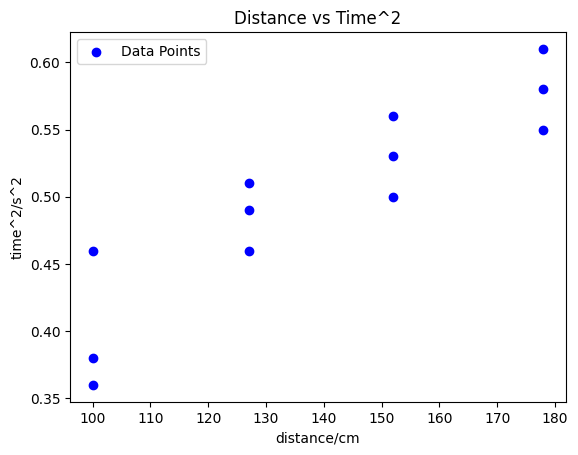

Coefficients: 0.0023
Intercept: 0.1849
Calculated g: 8.8623 m/s^2
Difference from typical g: 0.9443 m/s^2


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#(a)

d = [100,100,100,127,127,127,152,152,152,178,178,178]
t_squre = [0.36,0.38,0.46,0.46,0.49,0.51,0.50,0.53,0.56,0.55,0.58,0.61]

plt.scatter(d, t_squre, color='blue', label='Data Points')
plt.xlabel('distance/cm')
plt.ylabel('time^2/s^2')
plt.title('Distance vs Time^2')
plt.legend()
plt.show()

#(b)
my_linear_model = LinearRegression()
my_linear_model.fit(np.array(d).reshape(-1, 1), np.array(t_squre).reshape(-1, 1)) # training model

print(f'Coefficients: {my_linear_model.coef_[0][0]:.4f}') # priting trained/optimal coeffs of polynomial terms
print(f'Intercept: {my_linear_model.intercept_[0]:.4f}') # trained/optimal worker bias

#(c)
g_cal = 2/(my_linear_model.coef_[0][0]*100) # calculating g from coeffs
g_typical= 9.80665 # typical value of g
delta_g = abs(g_cal - g_typical) # calculating delta_g
print(f'Calculated g: {g_cal:.4f} m/s^2')
print(f'Difference from typical g: {delta_g:.4f} m/s^2')

p4

In [9]:
#(1)
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def model_D(x,D):
    poly = PolynomialFeatures(degree=D, include_bias=True)
    X_poly = poly.fit_transform(x)
    if D == 2:
        w = np.array([[5,1.5,0.03]])
    elif D == 3:
        w = np.array([[2,0.5,0.01,-0.001]])
    return X_poly @ w.T

x_validation = np.array([[4], [8], [9],[14]])
y_validation = np.array([[10], [20], [25], [35]])

y_pred_2 = model_D(x_validation, 2)
y_pred_3 = model_D(x_validation, 3)
mse_2 = mean_squared_error(y_validation, y_pred_2)
mse_3 = mean_squared_error(y_validation, y_pred_3)
print(f'MSE for D=2: {mse_2:.4f}')
print(f'MSE for D=3: {mse_3:.4f}')

MSE for D=2: 7.4140
MSE for D=3: 320.9830


(2)MSE for D=2 is much smaller than MSE for D=3,thus D=2 is more approperiate

p5

example code as below

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#function and its derivative
f = lambda v: v**4-5*v**2-3*v
f_derivative = lambda w: 4*w**3 - 10*w - 3

max_no_iterations = 10000
alpha = 0.2
epsilon = 0.001
w = np.zeros(max_no_iterations)
w0 = 0



#gradient descent
for i in range(1,max_no_iterations):
    w[i] = w[i-1] - alpha * f_derivative(w[i-1])
    if abs(f_derivative(w[i])) < epsilon:
        print(f'Convergence after {i} iterations ')
        print(f'the value of w at convergence is approximately {w[i]:.4f}')
        break


Convergence after 1090 iterations 
the value of w at convergence is approximately -1.4018


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#function and its derivative
f = lambda v: v**4-5*v**2-3*v
f_derivative = lambda w: 4*w**3 - 10*w - 3

max_no_iterations = 3
alpha = 0.1
w = np.zeros(max_no_iterations)
w0 = -2.0
w[0] = w0

#gradient descent
for i in range(1,max_no_iterations):
    w[i] = w[i-1] - alpha * f_derivative(w[i-1])
    print(f'Iteration {i}: w = {w[i]:.4f}, f(w) = {f(w[i]):.4f}')

Iteration 1: w = -0.5000, f(w) = 0.3125
Iteration 2: w = -0.6500, f(w) = 0.0160


(a)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#function and its derivative
f = lambda v: v**4-5*v**2-3*v
f_derivative = lambda w: 4*w**3 - 10*w - 3

max_no_iterations = 10000
alphas = [0.2,0.1,0.01,0.001]
epsilon = 0.001
w = np.zeros(max_no_iterations)
w0 = -2.0
w[0] = w0


#gradient descent
for alpha in alphas:
    print(f'Using alpha = {alpha}')
    w[0] = w0  # Reset w[0] for each alpha
     #gradient descent
    for i in range(1,max_no_iterations):
        w[i] = w[i-1] - alpha * f_derivative(w[i-1])
        if abs(f_derivative(w[i])) < epsilon:
            print(f'Convergence after {i} iterations ')
            print(f'the value of w at convergence is approximately {w[i]:.4f}')
            print(f'Optimal value of f(w) is {f(w[i]):.4f}')
            break

Using alpha = 0.2
Using alpha = 0.1
Convergence after 10 iterations 
the value of w at convergence is approximately -1.4017
Optimal value of f(w) is -1.7584
Using alpha = 0.01
Convergence after 58 iterations 
the value of w at convergence is approximately -1.4018
Optimal value of f(w) is -1.7584
Using alpha = 0.001
Convergence after 616 iterations 
the value of w at convergence is approximately -1.4018
Optimal value of f(w) is -1.7584


/var/folders/8f/s8cd84vs6ln67ggwr23649m80000gn/T/ipykernel_13280/4274278412.py:6: RuntimeWarning: overflow encountered in double_scalars
  f_derivative = lambda w: 4*w**3 - 10*w - 3
/var/folders/8f/s8cd84vs6ln67ggwr23649m80000gn/T/ipykernel_13280/4274278412.py:6: RuntimeWarning: invalid value encountered in double_scalars
  f_derivative = lambda w: 4*w**3 - 10*w - 3


When alpha = 0.2,no optimal value is obtained

(b)

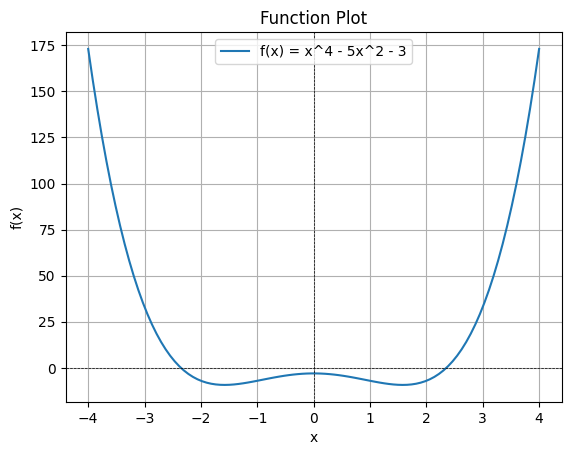

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 100)
y = x**4 - 5*x**2 - 3
plt.plot(x, y, label='f(x) = x^4 - 5x^2 - 3')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.title('Function Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#function and its derivative
f = lambda v: v**4-5*v**2-3*v
f_derivative = lambda w: 4*w**3 - 10*w - 3

max_no_iterations = 10000
alpha = 0.01
epsilon = 0.001
w = np.zeros(max_no_iterations)
w0 = 0.5



#gradient descent
for i in range(1,max_no_iterations):
    w[i] = w[i-1] - alpha * f_derivative(w[i-1])
    if abs(f_derivative(w[i])) < epsilon:
        print(f'Convergence after {i} iterations ')
        print(f'the value of w at convergence is approximately {w[i]:.4f}')
        break
print(f'Iteration {i}, w = {w[i]:.4f}, f(w) = {f(w[i]):.4f}')

Convergence after 54 iterations 
the value of w at convergence is approximately 1.7139
Iteration 54, w = 1.7139, f(w) = -11.2003


For my answer in a,I didn't get the global optimal value of w_0.But if we choose the alpha = 0.01 and w_0 = 0.5,we'll get the global optimal value of w_0.